#### Report of Exam Data Engineering :

# Meteorite data recordings

In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)# 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
df = pd.read_csv('../data/Meteorite_Landings.csv')
df.head(20) #View first 10 data rows

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [2]:
df.describe()

,id,mass (g),reclat,reclong
count,45716.000000,4.558500e+04,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,-39.122580,61.074319
std,16860.683030,5.749889e+05,46.378511,80.647298
min,1.000000,0.000000e+00,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,-76.714240,0.000000
50%,24261.500000,3.260000e+01,-71.500000,35.666670
75%,40656.750000,2.026000e+02,0.000000,157.166670
max,57458.000000,6.000000e+07,81.166670,354.473330


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass (g)       45585 non-null float64
fall           45716 non-null object
year           45425 non-null object
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## Data cleaning

In [17]:
df = df.dropna()
df = df.drop(df[df["mass (g)"] == 0].index)
df = df.drop(df[(df["reclat"] == 0) & (df["reclong"] == 0)].index)
df.to_csv('../data/washed_Meteorite_Landings.csv')

In [22]:
df.head(10)

,Unnamed: 0,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,5,Adhi Kot,379,Valid,EH4,4239.0,Fell,01/01/1919 12:00:00 AM,32.10000,71.80000,"(32.1, 71.8)"
6,6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,01/01/1949 12:00:00 AM,44.83333,95.16667,"(44.83333, 95.16667)"
7,7,Agen,392,Valid,H5,30000.0,Fell,01/01/1814 12:00:00 AM,44.21667,0.61667,"(44.21667, 0.61667)"
8,8,Aguada,398,Valid,L6,1620.0,Fell,01/01/1930 12:00:00 AM,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,9,Aguila Blanca,417,Valid,L,1440.0,Fell,01/01/1920 12:00:00 AM,-30.86667,-64.55000,"(-30.86667, -64.55)"


## Questions

### 1. Make an histogram of the mass distribution of meteorites. Do it again for the meteorites having a mass less or equal to 50 000 grams.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('../data/washed_Meteorite_Landings.csv')

Text(0.5, 1.0, 'Mass distribution of meteorites')

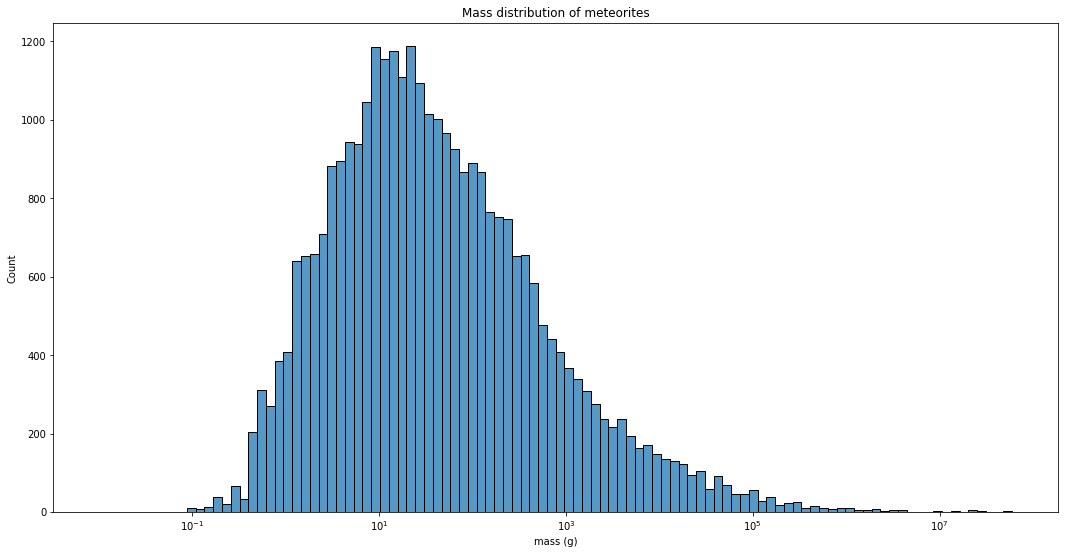

In [3]:
plt.figure(figsize=(18,9))
sns.histplot(data=df, x="mass (g)", log_scale=True).set_title("Mass distribution of meteorites")

Text(0.5, 1.0, 'Mass distribution of meteorites \n mass(g) <= 50 000(g)')

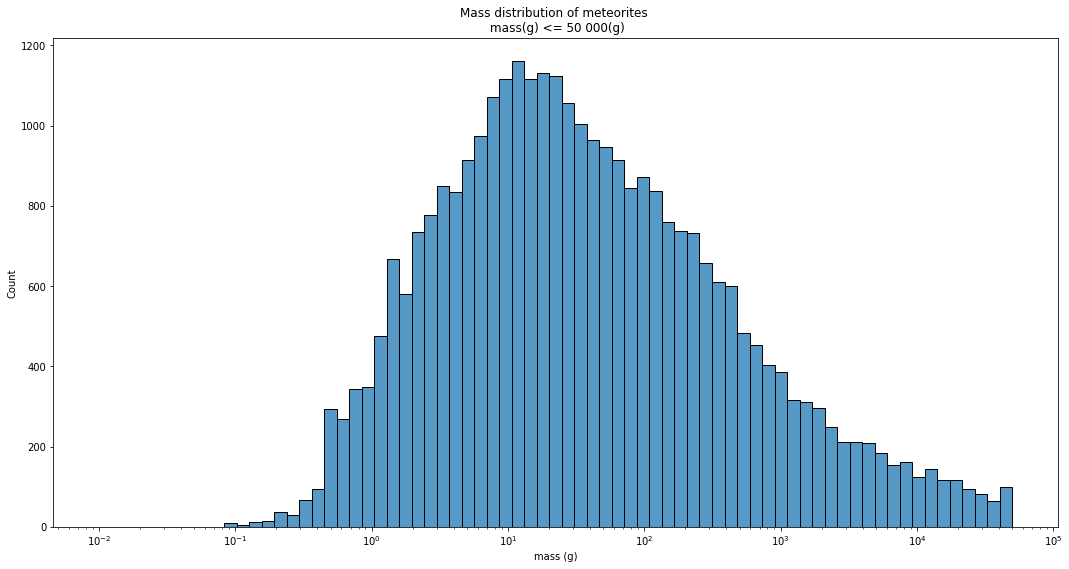

In [4]:
plt.figure(figsize=(18,9))
sns.histplot(data=df[df["mass (g)"] <= 50000], x="mass (g)", log_scale=True).set_title("Mass distribution of meteorites \n mass(g) <= 50 000(g)")

### 2. Make a plot of the number of meteorites as a function of time (by year).Find a linear $ (y = ax + b)$ that approximates the trend of the curve.Using this function say what would be the number of landing meteorites next year. Is this approach of prediction scientifically robust?

Text(0.5, 1.0, 'Number of meteorites by year')

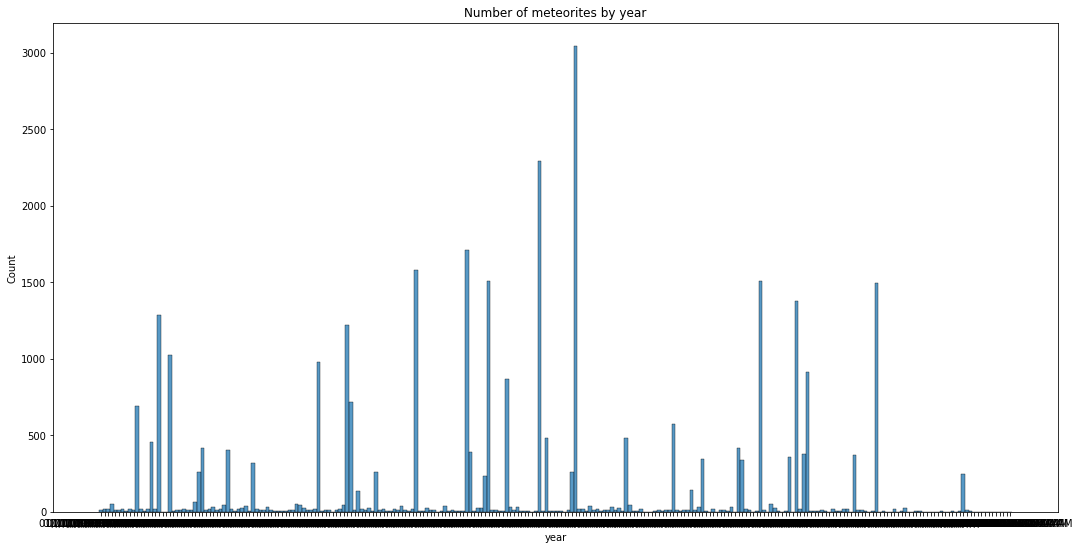

In [5]:
plt.figure(figsize=(18,9))
sns.histplot(data=df, x="year").set_title("Number of meteorites by year")

In [9]:
df.insert(df.shape[1],"year_only", df["year"].str[6:10])

Text(0.5, 1.0, 'Number of meteorites by year')

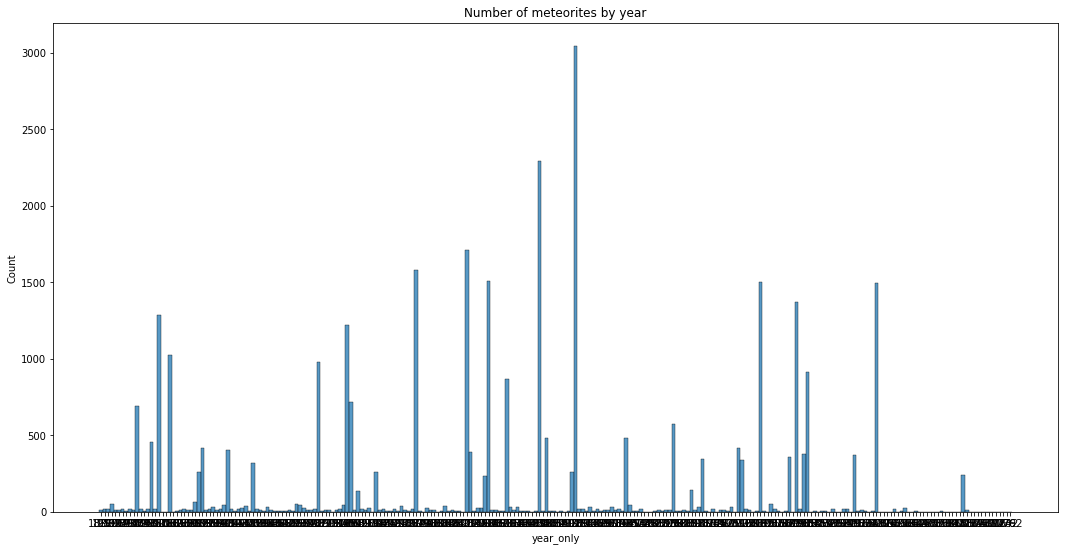

In [10]:
plt.figure(figsize=(18,9))
sns.histplot(data=df, x="year_only").set_title("Number of meteorites by year")

In [68]:
tab_yearCounts = df["year_only"]
tab_yearCounts = pd.DataFrame(tab_yearCounts.value_counts())
tab_yearCounts.to_csv('../data/year_counts.csv')
tab_yearCounts = pd.read_csv('../data/year_counts.csv')
tab_yearCounts.columns = ["year","counts"]
tab_yearCounts.to_csv('../data/year_counts.csv')

,year,counts
0,1979,3044
1,1988,2295
2,2003,1713
3,1999,1578
4,1990,1506
...,...,...
247,2013,1
248,1491,1
249,1628,1
250,1775,1


In [22]:
tab_yearCounts = pd.read_csv('../data/year_counts.csv')
tab_yearCounts.drop(columns=["Unnamed: 0"], inplace=True)
tab_yearCounts

,year,counts
0,1979,3044
1,1988,2295
2,2003,1713
3,1999,1578
4,1990,1506
...,...,...
247,2013,1
248,1491,1
249,1628,1
250,1775,1


Text(0.5, 1.0, 'Number of meteorites by year')

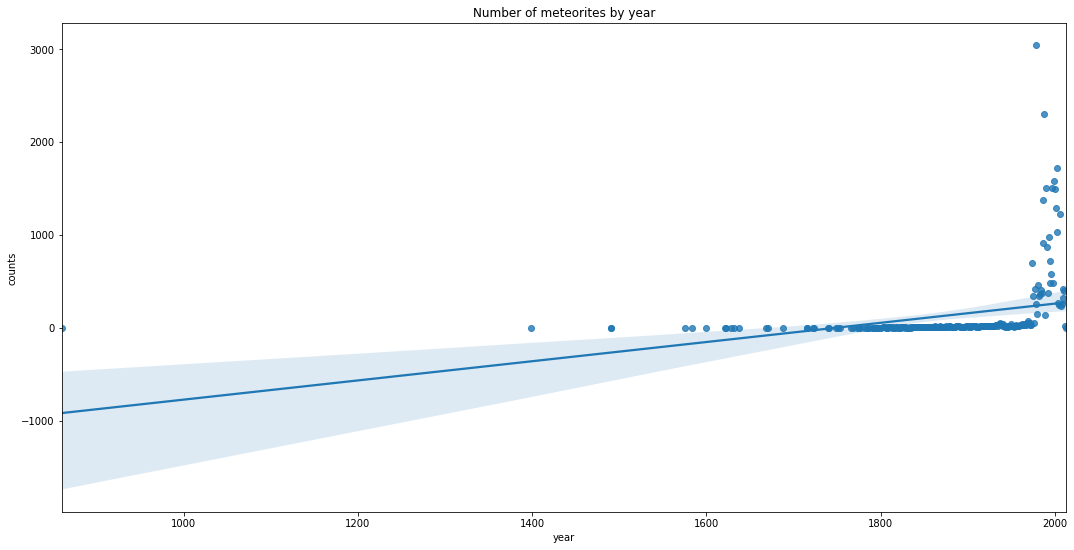

In [23]:
plt.figure(figsize=(18,9))
sns.regplot(data=tab_yearCounts, x="year", y="counts" ).set_title("Number of meteorites by year")

Text(0.5, 1.0, 'Number of meteorites by year')

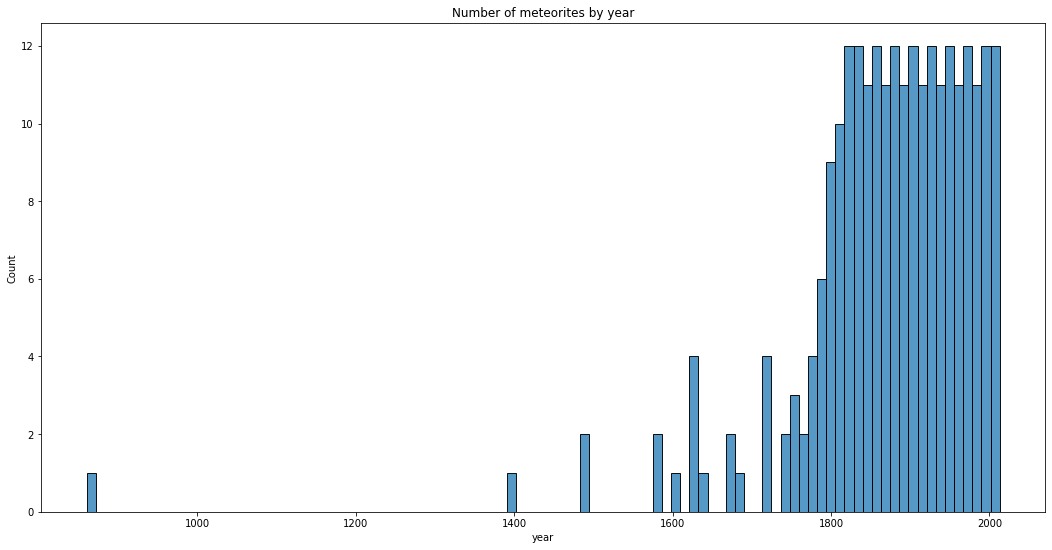

In [77]:
plt.figure(figsize=(18,9))
sns.histplot(data=tab_yearCounts, x="year", bins = 100).set_title("Number of meteorites by year")

#### Find a linear fit (y = ax + b) that approximates the trend of the curve.

In [25]:
from sklearn import datasets 
from sklearn.linear_model import LinearRegression

In [79]:
x_train = tab_yearCounts["year"].values.reshape(-1, 1)
y_train = tab_yearCounts["counts"].values.reshape(-1, 1)

In [37]:
model = LinearRegression() 
model.fit(x_train,y_train)
a = model.coef_                        # 模型的斜率（权重）
b = model.intercept_                   #模型的截距（偏置）

In [77]:
print("Y="+str(a[0,0])+"*X"+str(b[0]))

Y=1.0330193660211613*X-1807.0050316331262


Finally, the expression of our linear fit is as below:  

$Y=1.0330193660211613\times X-1807.0050316331262$

#### Using this function say what would be the number of landing meteorites next year.

In [82]:
model.predict([[2022]])

array([[281.76012646]])

Our model predict that the number of landing meteorites next year(year 2022) will be:  

$281.76012646 \approx 282$

### 3. We will concentrate now in the case of Oman. Create a plot of this country with different points representing the spatial distribution of the landing sites.